In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2


In [3]:
print(os. getcwd())

DATADIR = 'D:/Deep Learning//Datasets/kagglecatsanddogs_5340/PetImages'
CATEGORIES = ['Cat', 'Dog']

d:\Deep Learning


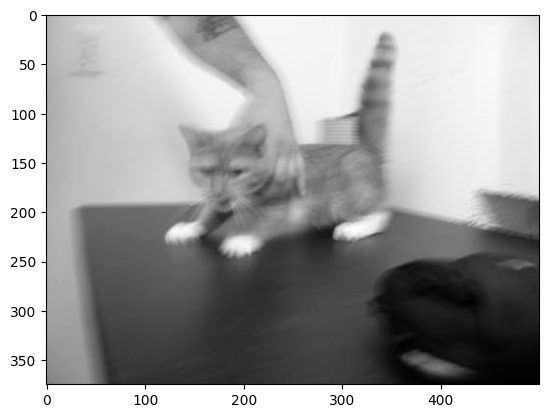

In [4]:
for catogory in CATEGORIES:
    path = os.path.join(DATADIR, catogory) #path to cats and dogs dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)

        plt.imshow(img_array, cmap='gray')
        break
    break

# print(img_array)
        

In [5]:
print(img_array.shape)

(375, 500)


<function matplotlib.pyplot.show(close=None, block=None)>

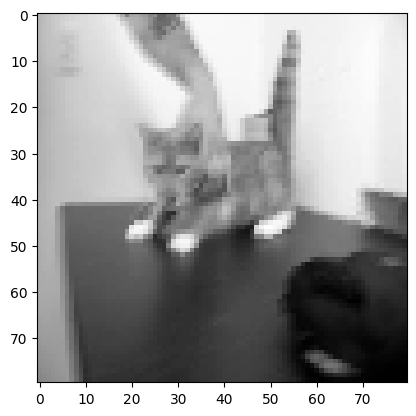

In [6]:
SIZE = 80

new_array = cv2.resize(img_array, (SIZE, SIZE))
plt.imshow(new_array, cmap = 'gray')
plt.show

In [7]:
training_data = []

def create_training_data():
    for catogory in CATEGORIES:
        path = os.path.join(DATADIR, catogory) #path to cats and dogs dir
        class_num = CATEGORIES.index(catogory)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (SIZE, SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            

create_training_data()
           
    

In [8]:
print(len(training_data))

24946


In [9]:
#as initial images are all of dogs then all of cats, the data is not properly shuffeled
# we need to shuffle the data

import random

random.shuffle(training_data)

In [10]:
for sample in training_data[:10]:
    print(sample[1])

1
0
1
0
1
0
1
0
0
0


In [11]:
X = []
y = []

In [12]:
for features, lables in training_data:
    X.append(features)
    y.append(lables)

X = np.array(X).reshape(-1, SIZE, SIZE,1)
print( X.shape)

(24946, 80, 80, 1)


In [13]:
import pickle


In [14]:

pickle_out = open("X.pickle", 'wb')
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", 'wb')
pickle.dump(y, pickle_out)
pickle_out.close()

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.optimizers import Adam


In [17]:
X  = pickle.load(open("X.pickle", "rb"))
y  = pickle.load(open("y.pickle", "rb"))

In [18]:
print(len(X))
print(X.shape)
# print(len(y))




24946
(24946, 80, 80, 1)


In [18]:
# Ensure X and y are numpy arrays
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)

# Normalize the input data
X = X / 255.0

model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.6))

model.add(Dense(32))
model.add(Activation("relu"))
model.add(Dropout(0.6))



model.add(Dense(1))
model.add(Activation("sigmoid"))


c:\Users\radhe shayam\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:

optimizer = Adam(learning_rate=0.0005, clipvalue=1.0)  # Clip gradients to a max value
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

In [20]:
model.fit(X, y, batch_size=32, epochs=10, validation_split=.4)

Epoch 1/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 71s 143ms/step - accuracy: 0.4989 - loss: 0.6978 - val_accuracy: 0.5473 - val_loss: 0.6864
Epoch 2/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 64s 137ms/step - accuracy: 0.5676 - loss: 0.6788 - val_accuracy: 0.6951 - val_loss: 0.6069
Epoch 3/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 63s 134ms/step - accuracy: 0.6665 - loss: 0.6198 - val_accuracy: 0.7422 - val_loss: 0.5367
Epoch 4/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 63s 134ms/step - accuracy: 0.7301 - loss: 0.5511 - val_accuracy: 0.7451 - val_loss: 0.5186
Epoch 5/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 68s 145ms/step - accuracy: 0.7551 - loss: 0.5129 - val_accuracy: 0.7776 - val_loss: 0.4770
Epoch 6/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 66s 140ms/step - accuracy: 0.7752 - loss: 0.4837 - val_accuracy: 0.7809 - val_loss: 0.4680
Epoch 7/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 62s 133ms/step - accuracy: 0.7901 - loss: 0.4546 - val_accuracy: 0.7813 - val_loss: 0.4692
Epoch 8/10
468/468 ━━━━━━━━━━━━━━━━━━━━ 61s 130ms/step - accuracy: 0.8182 - loss: 0

In [34]:
def preprocess_image(img_path):
    # Load the image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        raise ValueError(f"Image not found at {img_path}")
    
    # Resize to the model's expected size
    img = cv2.resize(img, (SIZE, SIZE))
    
    # Normalize pixel values to the range [0, 1]
    img = img / 255.0
    
    # Add batch and channel dimensions
    processed_img = np.expand_dims(img, axis=(0, -1))
    
    return processed_img

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Raw prediction: [[0.9285067]]
Predicted Class: Dog


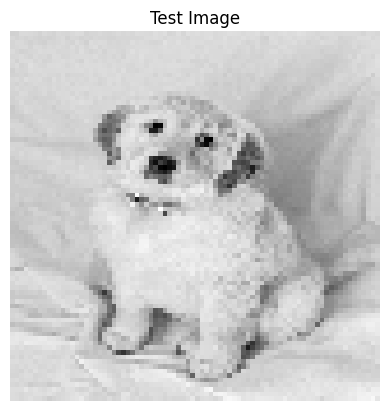

In [39]:
test_dog_image = 'D:/Deep Learning//Datasets/kagglecatsanddogs_5340/PetImages/dog.jpeg'

new_image = preprocess_image(test_dog_image)
prediction = model.predict(new_image)

# Print the prediction
print(f"Raw prediction: {prediction}")

# Interpret the prediction
if prediction[0][0] > 0.5:
    print("Predicted Class: Dog")
else:
    print("Predicted Class: Cat")

plt.imshow(new_image[0].reshape(SIZE, SIZE), cmap="gray")
plt.title("Test Image")
plt.axis("off")
plt.show()



In [41]:
# Save the model
model.save('cat_dog_classifier.model(79.99).h5')
